# Data extraction

In [1]:
from importlib import reload
import tensorflow as tf
import datetime

In [730]:
mnist = tf.keras.datasets.mnist # loading data

(x_train, y_train), (x_test, y_test) = mnist.load_data()

n_train = x_train.shape[0]
n_test = x_test.shape[0]

print(x_train.shape) # 60,000 images are used for training data
print(x_test.shape) # 10,000 images are used for testing. Input images are 28x28 pixels.

(60000, 28, 28)
(10000, 28, 28)


---
# 1: Data Visualisation
### Using PCA to analyse the variance of the MNIST dataset

In [273]:
import pca
pca = reload(pca)

%reload_ext autoreload

from pca import *

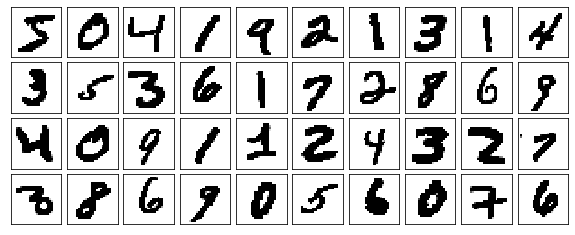

In [4]:
plot_digits(x_train, 28)

In [731]:
"""Standardising the data: converting pixel brightness
values from [0,255] to [-1,1]"""

x_train = standardise_data(x_train)
x_test = standardise_data(x_test)

(60000, 784)
(10000, 784)


In [275]:
"""PCA with 2 components"""
pca, projected = pca_analysis(x_train, 2)

(60000, 2)


In [279]:
exp_var = pca.explained_variance_ratio_
print(f'Component 1: {exp_var[0]}\nComponent 2: {exp_var[1]}\n\nTotal explained variance: {np.sum(exp_var)}')

Component 1: 0.09704664359699254
Component 2: 0.07095924058018409

Total explained variance: 0.16800588417717663


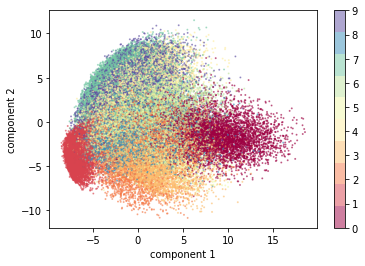

In [7]:
"""Visualisation of 2D embedding of the training data"""
plot_pca(projected, y_train)

Variation along the 2 principal components.

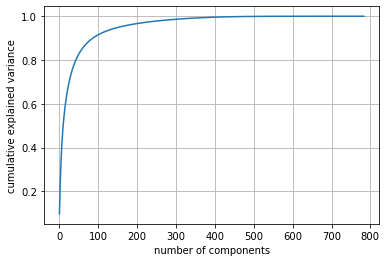

In [8]:
plot_cumulative_explained_variance(x_train)

---
# 2: Single layer Perceptron model coded from scratch

In [382]:
import perceptron
perceptron = reload(perceptron)

In [383]:
%reload_ext autoreload

In [384]:
from perceptron import *

In [368]:
"""Preparing binary data (only 1 and 0 digits)"""
binary_x_train, binary_y_train = prepare_binary(x_train, y_train, 0, 1)

# Same for test data:
binary_x_test, binary_y_test = prepare_binary(x_test, y_test, 0, 1)

[0. 1. 1. 1. 1.]
[1. 0. 1. 0. 0.]


In [10]:
print(binary_y_train.shape)
print(binary_x_train.shape)
print(f'proportion of entire training set: {(binary_y_train.shape[0]/y_train.shape[0]) * 100}')

(12665,)
(12665, 784)
proportion of entire training set: 21.108333333333334


In [11]:
binary_x_test.shape

(2115, 784)

## Training the perceptron model

In [335]:
import time
start=time.process_time()

v2_train_weights, v2_b, v2_losses = optimize(binary_x_train, binary_y_train, verbose=True)
print(time.process_time()-start)


Iteration 0
loss: 0.46750888274772995
L_rate: 1.0

Iteration 1
loss: 0.5323332017370707
L_rate: 1.0

Iteration 2
loss: 0.5323332017370707
L_rate: 1.0

Iteration 3
loss: 0.5323332017370707
L_rate: 1.0

Iteration 4
loss: 0.15791551519936833
L_rate: 1.0

Iteration 5
loss: 0.15791551519936833
L_rate: 1.0

Iteration 6
loss: 0.15791551519936833
L_rate: 1.0

Iteration 7
loss: 0.15791551519936833
L_rate: 1.0

Iteration 8
loss: 0.15791551519936833
L_rate: 1.0

Iteration 9
loss: 0.5323332017370707
L_rate: 1.0

Iteration 10
loss: 0.14330833004342677
L_rate: 1.0

Iteration 11
loss: 0.14330833004342677
L_rate: 1.0

Iteration 12
loss: 0.14330833004342677
L_rate: 1.0

Iteration 13
loss: 0.5323332017370707
L_rate: 1.0

Iteration 14
loss: 0.5323332017370707
L_rate: 1.0

Iteration 15
loss: 0.5323332017370707
L_rate: 1.0

Iteration 16
loss: 0.5323332017370707
L_rate: 1.0

Iteration 17
loss: 0.12183181997631268
L_rate: 1.0

Iteration 18
loss: 0.12183181997631268
L_rate: 1.0

Iteration 19
loss: 0.12183181


Iteration 156
loss: 0.007658902487169364
L_rate: 0.9

Iteration 157
loss: 0.007658902487169364
L_rate: 0.9

Iteration 158
loss: 0.007658902487169364
L_rate: 0.9

Iteration 159
loss: 0.007658902487169364
L_rate: 0.9

Iteration 160
loss: 0.007658902487169364
L_rate: 0.9

Iteration 161
loss: 0.007658902487169364
L_rate: 0.9

Iteration 162
loss: 0.007658902487169364
L_rate: 0.9

Iteration 163
loss: 0.007658902487169364
L_rate: 0.9

Iteration 164
loss: 0.007658902487169364
L_rate: 0.9

Iteration 165
loss: 0.007658902487169364
L_rate: 0.9

Iteration 166
loss: 0.007658902487169364
L_rate: 0.9

Iteration 167
loss: 0.007658902487169364
L_rate: 0.9

Iteration 168
loss: 0.007658902487169364
L_rate: 0.9

Iteration 169
loss: 0.007658902487169364
L_rate: 0.9

Iteration 170
loss: 0.007658902487169364
L_rate: 0.9

Iteration 171
loss: 0.007658902487169364
L_rate: 0.9

Iteration 172
loss: 0.007658902487169364
L_rate: 0.9

Iteration 173
loss: 0.007658902487169364
L_rate: 0.9

Iteration 174
loss: 0.00765


Iteration 309
loss: 0.005211212001579155
L_rate: 0.7

Iteration 310
loss: 0.005211212001579155
L_rate: 0.7

Iteration 311
loss: 0.02502960915909988
L_rate: 0.7

Iteration 312
loss: 0.02502960915909988
L_rate: 0.7

Iteration 313
loss: 0.02502960915909988
L_rate: 0.7

Iteration 314
loss: 0.02502960915909988
L_rate: 0.7

Iteration 315
loss: 0.02502960915909988
L_rate: 0.7

Iteration 316
loss: 0.02502960915909988
L_rate: 0.7

Iteration 317
loss: 0.02502960915909988
L_rate: 0.7

Iteration 318
loss: 0.0028424792735886302
L_rate: 0.7

Iteration 319
loss: 0.0028424792735886302
L_rate: 0.7

Iteration 320
loss: 0.0028424792735886302
L_rate: 0.7

Iteration 321
loss: 0.0028424792735886302
L_rate: 0.7

Iteration 322
loss: 0.0028424792735886302
L_rate: 0.7

Iteration 323
loss: 0.0028424792735886302
L_rate: 0.7

Iteration 324
loss: 0.0028424792735886302
L_rate: 0.7

Iteration 325
loss: 0.0028424792735886302
L_rate: 0.7

Iteration 326
loss: 0.0028424792735886302
L_rate: 0.7

Iteration 327
loss: 0.002


Iteration 459
loss: 0.0018160284247927358
L_rate: 0.6

Iteration 460
loss: 0.0018160284247927358
L_rate: 0.6

Iteration 461
loss: 0.0018160284247927358
L_rate: 0.6

Iteration 462
loss: 0.0018160284247927358
L_rate: 0.6

Iteration 463
loss: 0.0018160284247927358
L_rate: 0.6

Iteration 464
loss: 0.0018160284247927358
L_rate: 0.6

Iteration 465
loss: 0.0018160284247927358
L_rate: 0.6

Iteration 466
loss: 0.0018160284247927358
L_rate: 0.6

Iteration 467
loss: 0.0018160284247927358
L_rate: 0.6

Iteration 468
loss: 0.0018160284247927358
L_rate: 0.6

Iteration 469
loss: 0.0018160284247927358
L_rate: 0.6

Iteration 470
loss: 0.0018160284247927358
L_rate: 0.6

Iteration 471
loss: 0.0018160284247927358
L_rate: 0.6

Iteration 472
loss: 0.0018160284247927358
L_rate: 0.6

Iteration 473
loss: 0.0018160284247927358
L_rate: 0.6

Iteration 474
loss: 0.0018160284247927358
L_rate: 0.6

Iteration 475
loss: 0.0018160284247927358
L_rate: 0.6

Iteration 476
loss: 0.0018160284247927358
L_rate: 0.6

Iteration


Iteration 608
loss: 0.0017370706671930517
L_rate: 0.3999999999999999

Iteration 609
loss: 0.0017370706671930517
L_rate: 0.3999999999999999

Iteration 610
loss: 0.0017370706671930517
L_rate: 0.3999999999999999

Iteration 611
loss: 0.0017370706671930517
L_rate: 0.3999999999999999

Iteration 612
loss: 0.0017370706671930517
L_rate: 0.3999999999999999

Iteration 613
loss: 0.0017370706671930517
L_rate: 0.3999999999999999

Iteration 614
loss: 0.0017370706671930517
L_rate: 0.3999999999999999

Iteration 615
loss: 0.0017370706671930517
L_rate: 0.3999999999999999

Iteration 616
loss: 0.0017370706671930517
L_rate: 0.3999999999999999

Iteration 617
loss: 0.0017370706671930517
L_rate: 0.3999999999999999

Iteration 618
loss: 0.0017370706671930517
L_rate: 0.3999999999999999

Iteration 619
loss: 0.0017370706671930517
L_rate: 0.3999999999999999

Iteration 620
loss: 0.0017370706671930517
L_rate: 0.3999999999999999

Iteration 621
loss: 0.0017370706671930517
L_rate: 0.3999999999999999

Iteration 622
loss:


Iteration 729
loss: 0.002289774970390841
L_rate: 0.29999999999999993

Iteration 730
loss: 0.002289774970390841
L_rate: 0.29999999999999993

Iteration 731
loss: 0.002289774970390841
L_rate: 0.29999999999999993

Iteration 732
loss: 0.002289774970390841
L_rate: 0.29999999999999993

Iteration 733
loss: 0.002289774970390841
L_rate: 0.29999999999999993

Iteration 734
loss: 0.002289774970390841
L_rate: 0.29999999999999993

Iteration 735
loss: 0.002289774970390841
L_rate: 0.29999999999999993

Iteration 736
loss: 0.002289774970390841
L_rate: 0.29999999999999993

Iteration 737
loss: 0.002289774970390841
L_rate: 0.29999999999999993

Iteration 738
loss: 0.002289774970390841
L_rate: 0.29999999999999993

Iteration 739
loss: 0.002289774970390841
L_rate: 0.29999999999999993

Iteration 740
loss: 0.002289774970390841
L_rate: 0.29999999999999993

Iteration 741
loss: 0.002289774970390841
L_rate: 0.29999999999999993

Iteration 742
loss: 0.002289774970390841
L_rate: 0.29999999999999993

Iteration 743
loss:


Iteration 847
loss: 0.002289774970390841
L_rate: 0.19999999999999996

Iteration 848
loss: 0.002289774970390841
L_rate: 0.19999999999999996

Iteration 849
loss: 0.002289774970390841
L_rate: 0.19999999999999996

Iteration 850
loss: 0.002289774970390841
L_rate: 0.19999999999999996

Iteration 851
loss: 0.002289774970390841
L_rate: 0.19999999999999996

Iteration 852
loss: 0.002289774970390841
L_rate: 0.19999999999999996

Iteration 853
loss: 0.002289774970390841
L_rate: 0.19999999999999996

Iteration 854
loss: 0.002289774970390841
L_rate: 0.19999999999999996

Iteration 855
loss: 0.002289774970390841
L_rate: 0.19999999999999996

Iteration 856
loss: 0.002289774970390841
L_rate: 0.19999999999999996

Iteration 857
loss: 0.002289774970390841
L_rate: 0.19999999999999996

Iteration 858
loss: 0.002289774970390841
L_rate: 0.19999999999999996

Iteration 859
loss: 0.002289774970390841
L_rate: 0.19999999999999996

Iteration 860
loss: 0.002289774970390841
L_rate: 0.19999999999999996

Iteration 861
loss:


Iteration 966
loss: 0.002289774970390841
L_rate: 0.09999999999999998

Iteration 967
loss: 0.002289774970390841
L_rate: 0.09999999999999998

Iteration 968
loss: 0.002289774970390841
L_rate: 0.09999999999999998

Iteration 969
loss: 0.002289774970390841
L_rate: 0.09999999999999998

Iteration 970
loss: 0.002289774970390841
L_rate: 0.09999999999999998

Iteration 971
loss: 0.002289774970390841
L_rate: 0.09999999999999998

Iteration 972
loss: 0.002289774970390841
L_rate: 0.09999999999999998

Iteration 973
loss: 0.002289774970390841
L_rate: 0.09999999999999998

Iteration 974
loss: 0.002289774970390841
L_rate: 0.09999999999999998

Iteration 975
loss: 0.002289774970390841
L_rate: 0.09999999999999998

Iteration 976
loss: 0.002289774970390841
L_rate: 0.09999999999999998

Iteration 977
loss: 0.002289774970390841
L_rate: 0.09999999999999998

Iteration 978
loss: 0.002289774970390841
L_rate: 0.09999999999999998

Iteration 979
loss: 0.002289774970390841
L_rate: 0.09999999999999998

Iteration 980
loss:

## Testing

In [336]:
v2_test_pred = [predict(test_unit, v2_train_weights, v2_b) for test_unit in binary_x_test]
v2_test_loss = calc_loss(v2_test_pred, binary_y_test)
print(v2_test_loss)
print(f'{(1-v2_test_loss)*100}% accuracy')

0.0009456264775413711
99.90543735224587% accuracy


In [17]:
test_ones = len(binary_y_test[binary_y_test == 1])
test_zeros = len(binary_y_test[binary_y_test == -1])

ratio = test_ones/(test_ones+test_zeros)
ratio

0.5366430260047281

## Plotting loss against training iterations

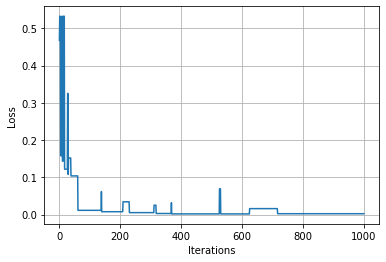

In [353]:
x, y = zip(*v2_losses.items())
plt.plot(x, y)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid()
plt.savefig("perceptron error curve")

## Plotting the final trained weights
#### Shows which pixels have been learnt to be associated with 0 digits, and which are associated with 1. Stronger colours show neurons which fire more for a certain digit.

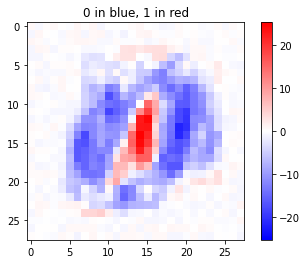

In [385]:
plot_weights(v2_train_weights, v2_b, 0, 1)

 ## Repeating for 5 other pairs
 ### Training 5 separate models to perform binary classification on the following pairs: (1,2), (3,4), (5,6), (7,8), (9,0)

In [20]:
"""Preparing all datasets"""
x_train_12, y_train_12 = prepare_binary(x_train, y_train, 1, 2)
x_train_34, y_train_34 = prepare_binary(x_train, y_train, 3, 4)
x_train_56, y_train_56 = prepare_binary(x_train, y_train, 5, 6)
x_train_78, y_train_78 = prepare_binary(x_train, y_train, 7, 8)
x_train_90, y_train_90 = prepare_binary(x_train, y_train, 9, 0)

x_test_12, y_test_12 = prepare_binary(x_test, y_test, 1, 2)
x_test_34, y_test_34 = prepare_binary(x_test, y_test, 3, 4)
x_test_56, y_test_56 = prepare_binary(x_test, y_test, 5, 6)
x_test_78, y_test_78 = prepare_binary(x_test, y_test, 7, 8)
x_test_90, y_test_90 = prepare_binary(x_test, y_test, 9, 0)

[1. 2. 1. 1. 1.]
[4. 3. 4. 3. 3.]
[5. 5. 6. 6. 6.]
[7. 8. 7. 8. 7.]
[0. 9. 9. 0. 9.]
[2. 1. 1. 1. 1.]
[4. 4. 3. 4. 4.]
[5. 6. 5. 6. 6.]
[7. 7. 7. 7. 7.]
[0. 9. 9. 0. 9.]


### Training

In [340]:
w_12, b_12, l_12 = optimize(x_train_12, y_train_12)

In [343]:
w_34, b_34, l_34 = optimize(x_train_34, y_train_34)

In [344]:
w_56, b_56, l_56 = optimize(x_train_56, y_train_56)

In [345]:
w_78, b_78, l_78 = optimize(x_train_78, y_train_78)

In [346]:
w_90, b_90, l_90 = optimize(x_train_90, y_train_90)

In [394]:
# Training accuracies:
print(f'Training accuracies:\n01: {1-v2_losses[1000]}\n12: {1-l_12[1000]}\n34: {1-l_34[1000]}\n56: {1-l_56[1000]}\n78: {1-l_78[1000]}\n90: {1-l_90[1000]}')

Training accuracies:
01: 0.9977102250296092
12: 0.9796850393700788
34: 0.9899774492608369
56: 0.9682511685333803
78: 0.9823374050841862
90: 0.9877021563342319


### Testing

In [347]:
pred_12 = [predict(i, w_12, b_12) for i in x_test_12]
testl_12 = calc_loss(pred_12, y_test_12)

pred_34 = [predict(i, w_34, b_34) for i in x_test_34]
testl_34 = calc_loss(pred_34, y_test_34)

pred_56 = [predict(i, w_56, b_56) for i in x_test_56]
testl_56 = calc_loss(pred_56, y_test_56)

pred_78 = [predict(i, w_78, b_78) for i in x_test_78]
testl_78 = calc_loss(pred_78, y_test_78)

pred_90 = [predict(i, w_90, b_90) for i in x_test_90]
testl_90 = calc_loss(pred_90, y_test_90)

In [348]:
# Testing accuracies
acc = np.array([testl_12, testl_34, testl_56, testl_78, testl_90])
acc = 1-acc
print(f'Test accuracies:\n12: {acc[0]}\n34: {acc[1]}\n56: {acc[2]}\n78: {acc[3]}\n90: {acc[4]}')

12: 0.981079833871712
34: 0.9894578313253012
56: 0.9713513513513513
78: 0.978021978021978
90: 0.9854198089492208


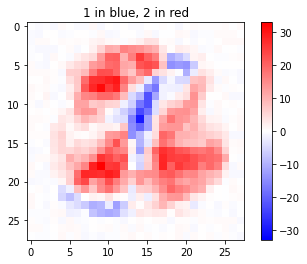

In [386]:
plot_weights(w_12, b_12, 1, 2)

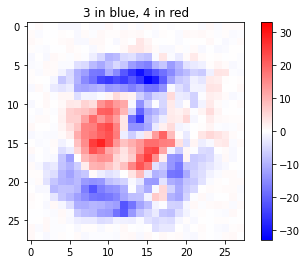

In [387]:
plot_weights(w_34, b_34, 3, 4)

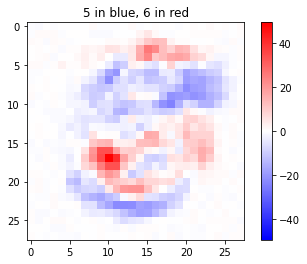

In [388]:
plot_weights(w_56, b_56, 5, 6)

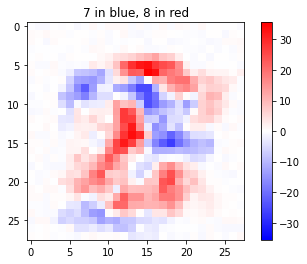

In [389]:
plot_weights(w_78, b_78, 7, 8)

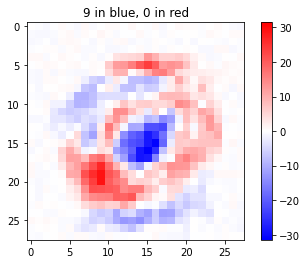

In [390]:
plot_weights(w_90, b_90, 9, 0)

---
# 3: Multi Layer Perceptron

In [743]:
"""Converting label vectors to matrices"""
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

In [30]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [73]:
%reload_ext autoreload

In [74]:
import mlp
mlp = reload(mlp)

In [75]:
from mlp import *

## Testing meta variables for model

In [101]:
model = create_model(2, 1000, dropout_rate=0)

log_dir = "logs/fit/b=50 " + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(x_train, y_train, batch_size = 50, epochs = 15, validation_data = (x_test, y_test), verbose = 2, callbacks=[tensorboard_callback])

Epoch 1/15
1200/1200 - 28s - loss: 0.2650 - accuracy: 0.9188 - val_loss: 0.1564 - val_accuracy: 0.9497
Epoch 2/15
1200/1200 - 22s - loss: 0.1280 - accuracy: 0.9609 - val_loss: 0.1171 - val_accuracy: 0.9638
Epoch 3/15
1200/1200 - 22s - loss: 0.1005 - accuracy: 0.9687 - val_loss: 0.0945 - val_accuracy: 0.9713
Epoch 4/15
1200/1200 - 21s - loss: 0.0851 - accuracy: 0.9723 - val_loss: 0.0894 - val_accuracy: 0.9728
Epoch 5/15
1200/1200 - 20s - loss: 0.0716 - accuracy: 0.9774 - val_loss: 0.1084 - val_accuracy: 0.9674
Epoch 6/15
1200/1200 - 19s - loss: 0.0621 - accuracy: 0.9798 - val_loss: 0.0998 - val_accuracy: 0.9722
Epoch 7/15
1200/1200 - 21s - loss: 0.0582 - accuracy: 0.9811 - val_loss: 0.0946 - val_accuracy: 0.9730
Epoch 8/15
1200/1200 - 21s - loss: 0.0515 - accuracy: 0.9839 - val_loss: 0.1168 - val_accuracy: 0.9724
Epoch 9/15
1200/1200 - 20s - loss: 0.0473 - accuracy: 0.9849 - val_loss: 0.0824 - val_accuracy: 0.9790
Epoch 10/15
1200/1200 - 20s - loss: 0.0419 - accuracy: 0.9865 - val_loss:

In [102]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (50, 1000)                785000    
_________________________________________________________________
dense_57 (Dense)             (50, 1000)                1001000   
_________________________________________________________________
dropout_16 (Dropout)         (50, 1000)                0         
_________________________________________________________________
dense_58 (Dense)             (50, 10)                  10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________


In [103]:
model = create_model(2, 1000, dropout_rate=0)

log_dir = "logs/fit/b=100 " + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(x_train, y_train, batch_size = 100, epochs = 15, validation_data = (x_test, y_test), verbose = 2, callbacks=[tensorboard_callback])

Epoch 1/15
600/600 - 13s - loss: 0.2614 - accuracy: 0.9201 - val_loss: 0.1686 - val_accuracy: 0.9453
Epoch 2/15
600/600 - 12s - loss: 0.1214 - accuracy: 0.9630 - val_loss: 0.1103 - val_accuracy: 0.9674
Epoch 3/15
600/600 - 12s - loss: 0.0911 - accuracy: 0.9715 - val_loss: 0.1014 - val_accuracy: 0.9685
Epoch 4/15
600/600 - 12s - loss: 0.0742 - accuracy: 0.9759 - val_loss: 0.1173 - val_accuracy: 0.9661
Epoch 5/15
600/600 - 12s - loss: 0.0657 - accuracy: 0.9791 - val_loss: 0.0993 - val_accuracy: 0.9707
Epoch 6/15
600/600 - 12s - loss: 0.0543 - accuracy: 0.9830 - val_loss: 0.0922 - val_accuracy: 0.9738
Epoch 7/15
600/600 - 12s - loss: 0.0495 - accuracy: 0.9840 - val_loss: 0.0840 - val_accuracy: 0.9751
Epoch 8/15
600/600 - 12s - loss: 0.0427 - accuracy: 0.9853 - val_loss: 0.0672 - val_accuracy: 0.9798
Epoch 9/15
600/600 - 12s - loss: 0.0405 - accuracy: 0.9874 - val_loss: 0.0885 - val_accuracy: 0.9761
Epoch 10/15
600/600 - 12s - loss: 0.0354 - accuracy: 0.9885 - val_loss: 0.0847 - val_accura

In [104]:
model = create_model(2, 1000, dropout_rate=0.2)

log_dir = "logs/fit/b=100, drop=0.2 " + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(x_train, y_train, batch_size = 100, epochs = 15, validation_data = (x_test, y_test), verbose = 2, callbacks=[tensorboard_callback])

Epoch 1/15
600/600 - 13s - loss: 0.2758 - accuracy: 0.9142 - val_loss: 0.1223 - val_accuracy: 0.9619
Epoch 2/15
600/600 - 12s - loss: 0.1275 - accuracy: 0.9612 - val_loss: 0.1093 - val_accuracy: 0.9662
Epoch 3/15
600/600 - 12s - loss: 0.0977 - accuracy: 0.9692 - val_loss: 0.0838 - val_accuracy: 0.9749
Epoch 4/15
600/600 - 12s - loss: 0.0828 - accuracy: 0.9740 - val_loss: 0.0946 - val_accuracy: 0.9702
Epoch 5/15
600/600 - 12s - loss: 0.0722 - accuracy: 0.9769 - val_loss: 0.1020 - val_accuracy: 0.9709
Epoch 6/15
600/600 - 12s - loss: 0.0580 - accuracy: 0.9815 - val_loss: 0.1035 - val_accuracy: 0.9742
Epoch 7/15
600/600 - 12s - loss: 0.0551 - accuracy: 0.9822 - val_loss: 0.0809 - val_accuracy: 0.9754
Epoch 8/15
600/600 - 12s - loss: 0.0485 - accuracy: 0.9844 - val_loss: 0.0710 - val_accuracy: 0.9793
Epoch 9/15
600/600 - 12s - loss: 0.0458 - accuracy: 0.9852 - val_loss: 0.0788 - val_accuracy: 0.9779
Epoch 10/15
600/600 - 12s - loss: 0.0410 - accuracy: 0.9871 - val_loss: 0.0887 - val_accura

In [105]:
model = create_model(2, 1000, dropout_rate=0.5)

log_dir = "logs/fit/b=100, drop=0.5 " + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(x_train, y_train, batch_size = 100, epochs = 15, validation_data = (x_test, y_test), verbose = 2, callbacks=[tensorboard_callback])

Epoch 1/15
600/600 - 14s - loss: 0.3008 - accuracy: 0.9075 - val_loss: 0.1446 - val_accuracy: 0.9531
Epoch 2/15
600/600 - 13s - loss: 0.1462 - accuracy: 0.9562 - val_loss: 0.1216 - val_accuracy: 0.9624
Epoch 3/15
600/600 - 13s - loss: 0.1106 - accuracy: 0.9661 - val_loss: 0.0971 - val_accuracy: 0.9695
Epoch 4/15
600/600 - 12s - loss: 0.0982 - accuracy: 0.9693 - val_loss: 0.0781 - val_accuracy: 0.9748
Epoch 5/15
600/600 - 12s - loss: 0.0868 - accuracy: 0.9722 - val_loss: 0.0824 - val_accuracy: 0.9750
Epoch 6/15
600/600 - 12s - loss: 0.0726 - accuracy: 0.9777 - val_loss: 0.0906 - val_accuracy: 0.9748
Epoch 7/15
600/600 - 12s - loss: 0.0664 - accuracy: 0.9791 - val_loss: 0.0947 - val_accuracy: 0.9736
Epoch 8/15
600/600 - 12s - loss: 0.0632 - accuracy: 0.9793 - val_loss: 0.0879 - val_accuracy: 0.9750
Epoch 9/15
600/600 - 12s - loss: 0.0619 - accuracy: 0.9808 - val_loss: 0.0923 - val_accuracy: 0.9722
Epoch 10/15
600/600 - 12s - loss: 0.0546 - accuracy: 0.9829 - val_loss: 0.0929 - val_accura

In [ ]:
%tensorboard --logdir logs/fit --host localhost

## Altering model complexity

In [112]:
model = create_model(7, 500, dropout_rate=0)

log_dir = "logs/fit/l=7, w=100, b=100 " + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(x_train, y_train, batch_size = 100, epochs = 15, validation_data = (x_test, y_test), verbose = 2, callbacks=[tensorboard_callback])

Epoch 1/15
600/600 - 3s - loss: 0.3802 - accuracy: 0.8786 - val_loss: 0.2063 - val_accuracy: 0.9360
Epoch 2/15
600/600 - 2s - loss: 0.1710 - accuracy: 0.9485 - val_loss: 0.1530 - val_accuracy: 0.9512
Epoch 3/15
600/600 - 2s - loss: 0.1360 - accuracy: 0.9576 - val_loss: 0.1212 - val_accuracy: 0.9642
Epoch 4/15
600/600 - 2s - loss: 0.1132 - accuracy: 0.9639 - val_loss: 0.1198 - val_accuracy: 0.9628
Epoch 5/15
600/600 - 2s - loss: 0.1018 - accuracy: 0.9682 - val_loss: 0.1025 - val_accuracy: 0.9689
Epoch 6/15
600/600 - 2s - loss: 0.0884 - accuracy: 0.9733 - val_loss: 0.1053 - val_accuracy: 0.9695
Epoch 7/15
600/600 - 2s - loss: 0.0831 - accuracy: 0.9736 - val_loss: 0.1190 - val_accuracy: 0.9649
Epoch 8/15
600/600 - 2s - loss: 0.0732 - accuracy: 0.9770 - val_loss: 0.0905 - val_accuracy: 0.9746
Epoch 9/15
600/600 - 2s - loss: 0.0705 - accuracy: 0.9775 - val_loss: 0.1213 - val_accuracy: 0.9652
Epoch 10/15
600/600 - 2s - loss: 0.0666 - accuracy: 0.9790 - val_loss: 0.1039 - val_accuracy: 0.9704

In [114]:
l3 = [250,500,2000]

for w in l3:
    model = create_model(3, w, dropout_rate=0)

    log_dir = "logs/fit/l=3, w="+ str(w) + " " + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

    history = model.fit(x_train, y_train, batch_size = 100, epochs = 15, validation_data = (x_test, y_test), verbose = 2, callbacks=[tensorboard_callback])

Epoch 1/15
600/600 - 4s - loss: 0.2907 - accuracy: 0.9101 - val_loss: 0.1760 - val_accuracy: 0.9443
Epoch 2/15
600/600 - 2s - loss: 0.1307 - accuracy: 0.9599 - val_loss: 0.1085 - val_accuracy: 0.9658
Epoch 3/15
600/600 - 2s - loss: 0.0989 - accuracy: 0.9686 - val_loss: 0.1091 - val_accuracy: 0.9643
Epoch 4/15
600/600 - 2s - loss: 0.0832 - accuracy: 0.9732 - val_loss: 0.0895 - val_accuracy: 0.9699
Epoch 5/15
600/600 - 2s - loss: 0.0705 - accuracy: 0.9769 - val_loss: 0.1123 - val_accuracy: 0.9658
Epoch 6/15
600/600 - 2s - loss: 0.0607 - accuracy: 0.9805 - val_loss: 0.0988 - val_accuracy: 0.9728
Epoch 7/15
600/600 - 3s - loss: 0.0548 - accuracy: 0.9824 - val_loss: 0.0695 - val_accuracy: 0.9787
Epoch 8/15
600/600 - 3s - loss: 0.0502 - accuracy: 0.9833 - val_loss: 0.0792 - val_accuracy: 0.9762
Epoch 9/15
600/600 - 2s - loss: 0.0448 - accuracy: 0.9849 - val_loss: 0.0866 - val_accuracy: 0.9759
Epoch 10/15
600/600 - 2s - loss: 0.0438 - accuracy: 0.9855 - val_loss: 0.0932 - val_accuracy: 0.9756

In [115]:
l4 = [250,500,1000]

for w in l4:
    model = create_model(4, w, dropout_rate=0)

    log_dir = "logs/fit/l=3, w="+ str(w) + " " + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

    history = model.fit(x_train, y_train, batch_size = 100, epochs = 15, validation_data = (x_test, y_test), verbose = 1, callbacks=[tensorboard_callback])

Epoch 1/15
600/600 [==============================] - 4s 7ms/step - loss: 0.2918 - accuracy: 0.9094 - val_loss: 0.1392 - val_accuracy: 0.9569
Epoch 2/15
600/600 [==============================] - 3s 5ms/step - loss: 0.1367 - accuracy: 0.9569 - val_loss: 0.1176 - val_accuracy: 0.9638
Epoch 3/15
600/600 [==============================] - 3s 5ms/step - loss: 0.1040 - accuracy: 0.9676 - val_loss: 0.1076 - val_accuracy: 0.9643
Epoch 4/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0879 - accuracy: 0.9727 - val_loss: 0.1281 - val_accuracy: 0.9605
Epoch 5/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0728 - accuracy: 0.9766 - val_loss: 0.0901 - val_accuracy: 0.9735
Epoch 6/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0675 - accuracy: 0.9786 - val_loss: 0.1002 - val_accuracy: 0.9677
Epoch 7/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0583 - accuracy: 0.9814 - val_loss: 0.0868 - val_accuracy: 0.9740
Epoch 

In [118]:
l6 = [100,250,500]

for w in l6:
    model = create_model(6, w, dropout_rate=0)

    log_dir = "logs/fit/l=6, w="+ str(w) + " " + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

    history = model.fit(x_train, y_train, batch_size = 100, epochs = 15, validation_data = (x_test, y_test), verbose = 1, callbacks=[tensorboard_callback])

Epoch 1/15
600/600 [==============================] - 3s 5ms/step - loss: 0.3751 - accuracy: 0.8794 - val_loss: 0.1832 - val_accuracy: 0.9453
Epoch 2/15
600/600 [==============================] - 3s 5ms/step - loss: 0.1705 - accuracy: 0.9470 - val_loss: 0.1623 - val_accuracy: 0.9490
Epoch 3/15
600/600 [==============================] - 2s 4ms/step - loss: 0.1361 - accuracy: 0.9575 - val_loss: 0.1595 - val_accuracy: 0.9490
Epoch 4/15
600/600 [==============================] - 2s 3ms/step - loss: 0.1131 - accuracy: 0.9646 - val_loss: 0.1287 - val_accuracy: 0.9611
Epoch 5/15
600/600 [==============================] - 2s 4ms/step - loss: 0.0979 - accuracy: 0.9687 - val_loss: 0.1346 - val_accuracy: 0.9607
Epoch 6/15
600/600 [==============================] - 2s 4ms/step - loss: 0.0898 - accuracy: 0.9723 - val_loss: 0.1025 - val_accuracy: 0.9702
Epoch 7/15
600/600 [==============================] - 2s 4ms/step - loss: 0.0844 - accuracy: 0.9744 - val_loss: 0.1073 - val_accuracy: 0.9689
Epoch 

In [119]:
l8 = [100,250,500]

for w in l8:
    model = create_model(8, w, dropout_rate=0)

    log_dir = "logs/fit/l=8, w="+ str(w) + " " + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

    history = model.fit(x_train, y_train, batch_size = 100, epochs = 15, validation_data = (x_test, y_test), verbose = 1, callbacks=[tensorboard_callback])

Epoch 1/15
600/600 [==============================] - 4s 7ms/step - loss: 0.3959 - accuracy: 0.8734 - val_loss: 0.2337 - val_accuracy: 0.9223
Epoch 2/15
600/600 [==============================] - 3s 5ms/step - loss: 0.1865 - accuracy: 0.9425 - val_loss: 0.1781 - val_accuracy: 0.9464
Epoch 3/15
600/600 [==============================] - 3s 5ms/step - loss: 0.1415 - accuracy: 0.9563 - val_loss: 0.1218 - val_accuracy: 0.9619
Epoch 4/15
600/600 [==============================] - 3s 5ms/step - loss: 0.1242 - accuracy: 0.9619 - val_loss: 0.1318 - val_accuracy: 0.9616
Epoch 5/15
600/600 [==============================] - 3s 4ms/step - loss: 0.1078 - accuracy: 0.9671 - val_loss: 0.1120 - val_accuracy: 0.9685
Epoch 6/15
600/600 [==============================] - 3s 4ms/step - loss: 0.0999 - accuracy: 0.9693 - val_loss: 0.1092 - val_accuracy: 0.9686
Epoch 7/15
600/600 [==============================] - 3s 4ms/step - loss: 0.0886 - accuracy: 0.9730 - val_loss: 0.1133 - val_accuracy: 0.9669
Epoch 

In [130]:
def params(l, w):
    params = (784*w)+w
    for j in range(l-1):
        params+=(w*w)+w
    params+=(w*10)+10
    return params

In [132]:
params(8,250)

638010

---
# 4: Convolutional Neural Network

In [254]:
import cnn
cnn = reload(cnn)

%reload_ext autoreload

from cnn import *

In [740]:
"""Reshaping data from vector to matrices"""
x_train.resize(60000,28,28)
x_test.resize(10000,28,28)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [741]:
x_train_c = np.expand_dims(x_train, -1)
x_test_c = np.expand_dims(x_test, -1)
print(x_train_c.shape)
print(x_test_c.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [151]:
%reload_ext tensorboard

In [258]:
widths = [32,64,128]

model = create_CNN(widths)

log_dir = "logs/fit/fCNN "+str(widths[0])+", "+str(widths[1])+", "+str(widths[2]) + ". " + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(x_train_c, y_train, epochs = 10, validation_data = (x_test_c, y_test), verbose = 1, callbacks=[tensorboard_callback])

Epoch 1/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1249 - accuracy: 0.9614 - val_loss: 0.0463 - val_accuracy: 0.9851
Epoch 2/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0438 - accuracy: 0.9865 - val_loss: 0.0400 - val_accuracy: 0.9876
Epoch 3/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0304 - accuracy: 0.9908 - val_loss: 0.0326 - val_accuracy: 0.9893
Epoch 4/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0238 - accuracy: 0.9923 - val_loss: 0.0258 - val_accuracy: 0.9916
Epoch 5/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0172 - accuracy: 0.9948 - val_loss: 0.0356 - val_accuracy: 0.9894
Epoch 6/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.0382 - val_accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0116 - accuracy: 0.9964 - val_loss: 0.0414 -

In [259]:
print(history.history['accuracy'][-1])
print(history.history['val_accuracy'][-1])

0.9973999857902527
0.9901999831199646


In [260]:
model.summary()

Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 25, 25, 32)        544       
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 11, 11, 64)        32832     
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 4, 4, 128)         131200    
_________________________________________________________________
flatten_27 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_238 (Dense)            (None, 10)                20490     
Total params: 185,066
Trainable params: 185,066
Non-trainable params: 0
_________________________________________________________________


## Changing the complexity of the CNN

In [220]:
v2_widths = [32,64]

v2_model = create_CNN(v2_widths)

log_dir = "logs/fit/fCNN "+str(v2_widths[0])+", "+str(v2_widths[1]) + ". " + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

v2_history = v2_model.fit(x_train_c, y_train, epochs = 10, validation_data = (x_test_c, y_test), verbose = 1, callbacks=[tensorboard_callback])

Epoch 1/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1285 - accuracy: 0.9614 - val_loss: 0.0487 - val_accuracy: 0.9832
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0444 - accuracy: 0.9862 - val_loss: 0.0416 - val_accuracy: 0.9869
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.0454 - val_accuracy: 0.9853
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0206 - accuracy: 0.9938 - val_loss: 0.0362 - val_accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0146 - accuracy: 0.9952 - val_loss: 0.0464 - val_accuracy: 0.9879
Epoch 6/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0114 - accuracy: 0.9964 - val_loss: 0.0460 - val_accuracy: 0.9879
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0092 - accuracy: 0.9968 - val_loss: 0.0490 -

In [221]:
v2_model.summary()

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 25, 25, 32)        544       
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 11, 11, 64)        32832     
_________________________________________________________________
flatten_21 (Flatten)         (None, 7744)              0         
_________________________________________________________________
dense_224 (Dense)            (None, 10)                77450     
Total params: 110,826
Trainable params: 110,826
Non-trainable params: 0
_________________________________________________________________


In [222]:
print(v2_history.history["accuracy"][-1])
print(v2_history.history["val_accuracy"][-1])

0.9980666637420654
0.9884999990463257


In [223]:
v3_widths = [128,64,32]

v3_model = create_CNN(v3_widths)

log_dir = "logs/fit/fCNN 128,64,32. " + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

v3_history = v3_model.fit(x_train_c, y_train, epochs = 10, validation_data = (x_test_c, y_test), verbose = 1, callbacks=[tensorboard_callback])

Epoch 1/10
1875/1875 [==============================] - 136s 72ms/step - loss: 0.1473 - accuracy: 0.9551 - val_loss: 0.0572 - val_accuracy: 0.9814
Epoch 2/10
1875/1875 [==============================] - 139s 74ms/step - loss: 0.0564 - accuracy: 0.9829 - val_loss: 0.0424 - val_accuracy: 0.9882
Epoch 3/10
1875/1875 [==============================] - 136s 72ms/step - loss: 0.0390 - accuracy: 0.9882 - val_loss: 0.0449 - val_accuracy: 0.9862
Epoch 4/10
1875/1875 [==============================] - 136s 72ms/step - loss: 0.0321 - accuracy: 0.9901 - val_loss: 0.0408 - val_accuracy: 0.9884
Epoch 5/10
1875/1875 [==============================] - 136s 72ms/step - loss: 0.0261 - accuracy: 0.9916 - val_loss: 0.0358 - val_accuracy: 0.9892
Epoch 6/10
1875/1875 [==============================] - 138s 74ms/step - loss: 0.0203 - accuracy: 0.9931 - val_loss: 0.0391 - val_accuracy: 0.9885
Epoch 7/10
1875/1875 [==============================] - 139s 74ms/step - loss: 0.0173 - accuracy: 0.9943 - val_loss: 0

In [224]:
print(v3_model.summary())

print(v3_history.history["accuracy"][-1])
print(v3_history.history["val_accuracy"][-1])

Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 25, 25, 128)       2176      
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 11, 11, 64)        131136    
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 4, 4, 32)          32800     
_________________________________________________________________
flatten_22 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_225 (Dense)            (None, 10)                5130      
Total params: 171,242
Trainable params: 171,242
Non-trainable params: 0
_________________________________________________________________
None
0.9962666630744934
0.9861000180244446


In [225]:
v4_widths = [16,32,64,128]

v4_model = create_CNN(v4_widths)

log_dir = "logs/fit/fCNN 16,32,64,128. " + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

v4_history = v4_model.fit(x_train_c, y_train, epochs = 10, validation_data = (x_test_c, y_test), verbose = 1, callbacks=[tensorboard_callback])

Epoch 1/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1408 - accuracy: 0.9557 - val_loss: 0.0441 - val_accuracy: 0.9859
Epoch 2/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0462 - accuracy: 0.9855 - val_loss: 0.0384 - val_accuracy: 0.9879
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0324 - val_accuracy: 0.9887
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.0364 - val_accuracy: 0.9888
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0188 - accuracy: 0.9942 - val_loss: 0.0338 - val_accuracy: 0.9905
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0152 - accuracy: 0.9951 - val_loss: 0.0366 - val_accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0118 - accuracy: 0.9959 - val_loss: 0.0371 -

In [226]:
print(v4_model.summary())
print(v4_history.history["accuracy"][-1])
print(v4_history.history["val_accuracy"][-1])

Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 25, 25, 16)        272       
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 11, 11, 32)        8224      
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 4, 4, 64)          32832     
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 1, 1, 128)         131200    
_________________________________________________________________
flatten_23 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_226 (Dense)            (None, 10)                1290      
Total params: 173,818
Trainable params: 173,818
Non-trainable params: 0
_______________________________________________

In [256]:
v5_widths = [16,32,64,128,256]

v5_model = create_CNN(v5_widths, zero_pad=True)

log_dir = "logs/fit/fCNN 16,32,64,128,256. " + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

v5_history = v5_model.fit(x_train_c, y_train, epochs = 10, validation_data = (x_test_c, y_test), verbose = 1, callbacks=[tensorboard_callback])

Epoch 1/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.1223 - accuracy: 0.9621 - val_loss: 0.0482 - val_accuracy: 0.9847
Epoch 2/10
1875/1875 [==============================] - 95s 50ms/step - loss: 0.0440 - accuracy: 0.9868 - val_loss: 0.0347 - val_accuracy: 0.9883
Epoch 3/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0312 - accuracy: 0.9905 - val_loss: 0.0358 - val_accuracy: 0.9885
Epoch 4/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0241 - accuracy: 0.9925 - val_loss: 0.0263 - val_accuracy: 0.9922
Epoch 5/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.0322 - val_accuracy: 0.9894
Epoch 6/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0161 - accuracy: 0.9950 - val_loss: 0.0417 - val_accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0139 - accuracy: 0.9958 - val_loss: 0.0265 -

In [257]:
print(v5_model.summary())
print(v5_history.history["accuracy"][-1])
print(v5_history.history["val_accuracy"][-1])

Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_95 (Conv2D)           (None, 25, 25, 16)        272       
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 27, 27, 16)        0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 12, 12, 32)        8224      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 6, 6, 64)          32832     
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 3, 3, 128)       

In [ ]:
%tensorboard --logdir logs/fit --host localhost

---
# 5: Visualising CNN outcomes 

In [830]:
import visualizing_cnn
visualizing_cnn = reload(visualizing_cnn)

%reload_ext autoreload

from visualizing_cnn import *

In [733]:
model.summary()

Model: "functional_29"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 26, 26, 32)   320         input[0][0]                      
__________________________________________________________________________________________________
pool_1 (MaxPooling2D)           (None, 13, 13, 32)   0           conv_1[0][0]                     
__________________________________________________________________________________________________
conv_2 (Conv2D)                 (None, 11, 11, 64)   18496       pool_1[0][0]                     
______________________________________________________________________________________

In [739]:
x_train_c[0].shape

(784, 1)

In [745]:
widths = [32,64,128]

cnn = create_CNN(widths)
cnn_history = cnn.fit(x_train_c, y_train, epochs = 5, validation_data = (x_test_c, y_test), verbose = 1)

Epoch 1/5
1875/1875 [==============================] - 77s 41ms/step - loss: 0.1205 - accuracy: 0.9627 - val_loss: 0.0452 - val_accuracy: 0.9847
Epoch 2/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0428 - accuracy: 0.9872 - val_loss: 0.0370 - val_accuracy: 0.9889
Epoch 3/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0299 - accuracy: 0.9905 - val_loss: 0.0310 - val_accuracy: 0.9908
Epoch 4/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0218 - accuracy: 0.9930 - val_loss: 0.0393 - val_accuracy: 0.9882
Epoch 5/5
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0156 - accuracy: 0.9950 - val_loss: 0.0361 - val_accuracy: 0.9898


In [768]:
for layer in cnn.layers:
    print(layer.name)

conv2d_130
conv2d_131
conv2d_132
flatten_37
dense_272


In [761]:
cnn.trainable_variables[0]

<tf.Variable 'conv2d_130/kernel:0' shape=(4, 4, 1, 32) dtype=float32, numpy=
array([[[[-3.76360789e-02,  1.22200906e-01,  1.90906953e-02,
          -4.57307063e-02,  7.92146251e-02,  7.81710744e-02,
           4.67951745e-02,  1.70807540e-02,  5.79196885e-02,
          -9.24101472e-02, -1.76138477e-04, -7.47310370e-03,
          -6.57560974e-02, -3.62482667e-02, -1.04201178e-03,
           6.21873327e-02, -5.68941049e-02,  3.33300829e-02,
           5.17250821e-02,  3.97405103e-02, -1.08553402e-01,
           5.57272248e-02, -3.27820666e-02, -6.74238335e-03,
           1.52760521e-01,  7.56247491e-02, -6.95134252e-02,
           6.85290396e-02,  1.35746943e-02,  6.90900236e-02,
          -5.93262203e-02,  7.02163577e-02]],

        [[-8.67107287e-02, -1.27376273e-01, -2.23770384e-02,
          -1.76023692e-02, -7.91792385e-03, -9.96020362e-02,
           4.93101925e-02,  4.65381257e-02,  1.43159151e-01,
           3.93209010e-02, -8.66644457e-03, -1.76407248e-01,
           1.40257319e

## Plotting the kernels

In [502]:
filters_0, biases_0 = model.layers[0].get_weights() # gettin array of filters for the first layer in the model (32 kernels)
filters_1, biases_1 = model.layers[1].get_weights() # repeat for 2nd and 3rd layers
filters_2, biases_2 = model.layers[2].get_weights()

print(f'Shape of filters for convolution layers: \n{filters_0.shape} \n{filters_1.shape}, \n{filters_2.shape}\n\n')

f0_col, f0_row = filters_0.shape[-1], filters_0.shape[-2]
f1_col, f1_row = filters_1.shape[-1], filters_1.shape[-2]
f2_col, f2_row = filters_2.shape[-1], filters_2.shape[-2]

# resizing the filters to make it easy to plot them all
filters_0.resize((4,4,f0_col*f0_row))
filters_1.resize((4,4,f1_col*f1_row))
filters_2.resize((4,4,f2_col*f2_row))

print(f'New shape of filters for convolution layers: \n{filters_0.shape} \n{filters_1.shape}, \n{filters_2.shape}')

Shape of filters for convolution layers: 
(4, 4, 1, 32) 
(4, 4, 32, 64), 
(4, 4, 64, 128)


New shape of filters for convolution layers: 
(4, 4, 32) 
(4, 4, 2048), 
(4, 4, 8192)


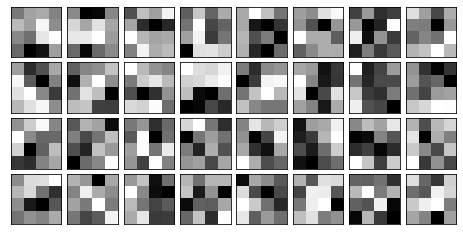

In [836]:
plot_filters(filters_0, 8, 4)

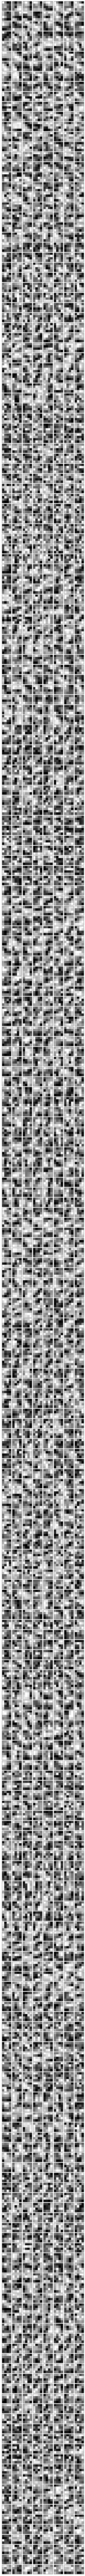

In [773]:
plot_filters(filters_1, 8, 256)

## Plotting the feature maps

In [532]:
from keras.models import Model

l1_model=Model(inputs=model.inputs, outputs = model.layers[0].output)
l2_model=Model(inputs=model.inputs, outputs=model.layers[1].output)
l3_model=Model(inputs=model.inputs, outputs=model.layers[2].output)

In [575]:
layer_names = [layer.name for layer in model.layers]

In [622]:
model.summary()

Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 25, 25, 32)        544       
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 11, 11, 64)        32832     
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 4, 4, 128)         131200    
_________________________________________________________________
flatten_27 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_238 (Dense)            (None, 10)                20490     
Total params: 185,066
Trainable params: 185,066
Non-trainable params: 0
_________________________________________________________________


In [812]:
layer_outputs=[layer.output for layer in cnn.layers]

feature_map_model_l1 = Model(inputs=cnn.inputs, outputs=layer_outputs[0])
feature_map_model_l2 = Model(inputs=cnn.inputs, outputs=layer_outputs[1])
feature_map_model_l3 = Model(inputs=cnn.inputs, outputs=layer_outputs[2])

print(feature_map_model_l1.summary())
print(feature_map_model_l2.summary())
print(feature_map_model_l3.summary())

Model: "functional_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_130_input (InputLayer [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 25, 25, 32)        544       
Total params: 544
Trainable params: 544
Non-trainable params: 0
_________________________________________________________________
None
Model: "functional_99"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_130_input (InputLayer [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 25, 25, 32)        544       
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 11, 11, 64)        32832     
Total params: 33,376
Traina

In [810]:
feature_map_model_l3.summary()

Model: "functional_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 13, 13, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [791]:
two, nine = x_test_c[1], x_test_c[7] # the first 2 and 9 in the test dataset
two, nine = two.reshape((1,) + two.shape), nine.reshape((1,) + nine.shape)

In [813]:
feature2_l1 =feature_map_model_l1.predict(two)
feature9_l1 =feature_map_model_l1.predict(nine)

feature2_l2 =feature_map_model_l2.predict(two)
feature9_l2 =feature_map_model_l2.predict(nine)

feature2_l3 =feature_map_model_l3.predict(two)
feature9_l3 =feature_map_model_l3.predict(nine)

In [818]:
feature9_l3.shape

(1, 4, 4, 128)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\benwi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3397, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\benwi\AppData\Local\Temp\ipykernel_46768\2739228658.py", line 1, in <cell line: 1>
    plot_feature_maps(feature9_l3)
  File "C:\Users\benwi\OneDrive - University of Bath\Documents\AI\09 Machine Learning\Assignment2_codes\Task5.py", line 21, in plot_feature_maps
    plt.savefig('feature map')
  File "C:\Users\benwi\anaconda3\lib\site-packages\matplotlib\pyplot.py", line 958, in savefig
    res = fig.savefig(*args, **kwargs)
  File "C:\Users\benwi\anaconda3\lib\site-packages\matplotlib\figure.py", line 3019, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "C:\Users\benwi\anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 2319, in print_figure
    result = print_method(
  File "C:\Users\benwi\anaconda3\lib\site-packages\matplotlib\backend_bases.py",

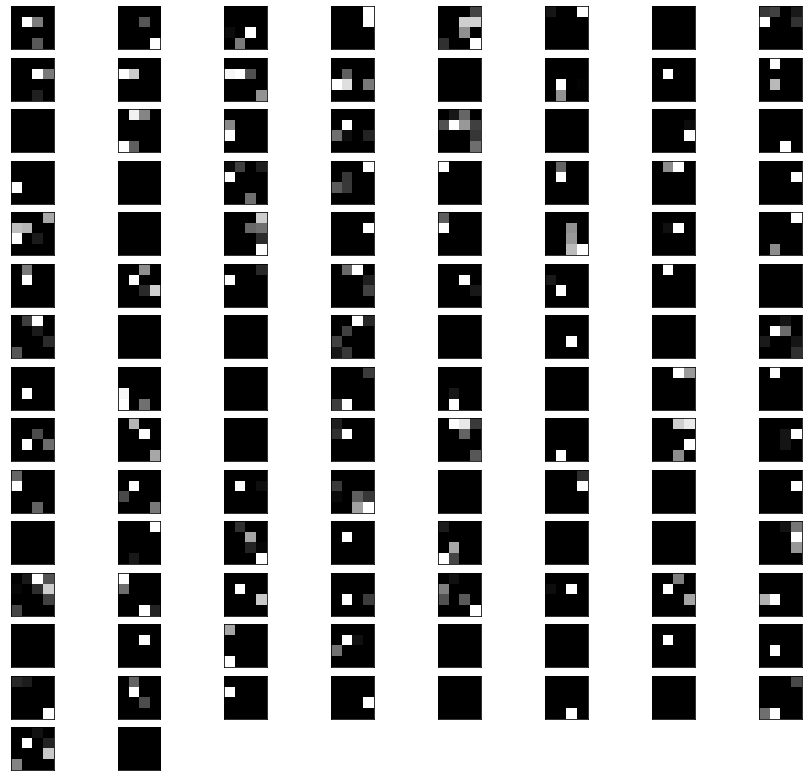

In [833]:
plot_feature_maps(feature9_l3)

---
# 6: Multi Task Learning

In [719]:
import multitask_learning
multitask_learning = reload(multitask_learning)

%reload_ext autoreload

from multitask_learning import *

In [658]:
fashion_mnist = keras.datasets.fashion_mnist

x_train, y_train_1, y_train_2, x_test, y_test_1, y_test_2 = load_data(fashion_mnist)

In [649]:
print(x_train.shape)
print(x_test.shape)
print(y_train_1.shape)
print(y_train_2.shape)
print(y_test_1.shape)
print(y_test_2.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(60000, 3)
(10000, 10)
(10000, 3)


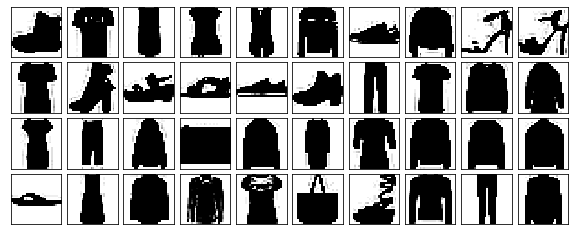

In [650]:
plot_digits(x_train)

## Training individual models

In [660]:
model_t1, model_t2 = CNN_fashion(10), CNN_fashion(3)
history_t1 = model_t1.fit(x_train, y_train_1, epochs = 5, validation_data = (x_test, y_test_1), verbose = 1)

Epoch 1/5
1875/1875 [==============================] - 179s 95ms/step - loss: 0.4398 - accuracy: 0.8407 - val_loss: 0.3737 - val_accuracy: 0.8597
Epoch 2/5
1875/1875 [==============================] - 172s 92ms/step - loss: 0.2972 - accuracy: 0.8938 - val_loss: 0.3078 - val_accuracy: 0.8841
Epoch 3/5
1875/1875 [==============================] - 165s 88ms/step - loss: 0.2527 - accuracy: 0.9084 - val_loss: 0.2920 - val_accuracy: 0.9006
Epoch 4/5
1875/1875 [==============================] - 166s 88ms/step - loss: 0.2256 - accuracy: 0.9183 - val_loss: 0.2803 - val_accuracy: 0.8981
Epoch 5/5
1875/1875 [==============================] - 192s 103ms/step - loss: 0.1972 - accuracy: 0.9263 - val_loss: 0.2634 - val_accuracy: 0.9052


In [661]:
history_t2 = model_t2.fit(x_train, y_train_2, epochs = 5, validation_data = (x_test, y_test_2), verbose = 1)

Epoch 1/5
1875/1875 [==============================] - 166s 89ms/step - loss: 0.2355 - accuracy: 0.8935 - val_loss: 0.2071 - val_accuracy: 0.9152
Epoch 2/5
1875/1875 [==============================] - 163s 87ms/step - loss: 0.1749 - accuracy: 0.9241 - val_loss: 0.1855 - val_accuracy: 0.9228
Epoch 3/5
1875/1875 [==============================] - 179s 95ms/step - loss: 0.1524 - accuracy: 0.9344 - val_loss: 0.1968 - val_accuracy: 0.9200
Epoch 4/5
1875/1875 [==============================] - 176s 94ms/step - loss: 0.1378 - accuracy: 0.9419 - val_loss: 0.1671 - val_accuracy: 0.9338
Epoch 5/5
1875/1875 [==============================] - 173s 92ms/step - loss: 0.1263 - accuracy: 0.9470 - val_loss: 0.1779 - val_accuracy: 0.9201


In [834]:
model_t2.summary()

Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_112 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_31 (Flatten)         (None, 1152)              0         
_________________________________________________________________
dense_251 (Dense)            (None, 3136)            

## Multi task learning

In [704]:
model = mtl()
model.summary()

Model: "functional_29"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 26, 26, 32)   320         input[0][0]                      
__________________________________________________________________________________________________
pool_1 (MaxPooling2D)           (None, 13, 13, 32)   0           conv_1[0][0]                     
__________________________________________________________________________________________________
conv_2 (Conv2D)                 (None, 11, 11, 64)   18496       pool_1[0][0]                     
______________________________________________________________________________________

In [705]:
model.compile(loss = 
              {'item': 'categorical_crossentropy', 'category': 'categorical_crossentropy'},
              optimizer='Adam', metrics = ['accuracy'])

In [706]:
mtl_history = model.fit(x_train, y=(y_train_1, y_train_2), epochs = 5, validation_data = (x_test, (y_test_1, y_test_2)), verbose = 1)

Epoch 1/5
1875/1875 [==============================] - 238s 127ms/step - loss: 0.6723 - item_loss: 0.4509 - category_loss: 0.2214 - item_accuracy: 0.8339 - category_accuracy: 0.8997 - val_loss: 0.5144 - val_item_loss: 0.3433 - val_category_loss: 0.1711 - val_item_accuracy: 0.8749 - val_category_accuracy: 0.9279
Epoch 2/5
1875/1875 [==============================] - 255s 136ms/step - loss: 0.4626 - item_loss: 0.3044 - category_loss: 0.1583 - item_accuracy: 0.8901 - category_accuracy: 0.9319 - val_loss: 0.4696 - val_item_loss: 0.3050 - val_category_loss: 0.1646 - val_item_accuracy: 0.8918 - val_category_accuracy: 0.9300
Epoch 3/5
1875/1875 [==============================] - 226s 120ms/step - loss: 0.3996 - item_loss: 0.2612 - category_loss: 0.1384 - item_accuracy: 0.9056 - category_accuracy: 0.9407 - val_loss: 0.4632 - val_item_loss: 0.3094 - val_category_loss: 0.1538 - val_item_accuracy: 0.8875 - val_category_accuracy: 0.9324
Epoch 4/5
1875/1875 [==============================] - 234s 1